#### import the things

In [3]:
import pandas as pd
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

idx = pd.IndexSlice

In [4]:
data_fol = r"..\data_files"

In [5]:
df = pd.read_pickle(os.path.join(data_fol, "final_dataset.pkl"))

In [6]:
df.head()

,,quote_count,reply_count,retweet_count,favorite_count,user_followers_count,user_verified,text,media_count,media_types
tid,uid,,,,,,,,,
1333476068192366593,2152363202,0,2,3,16,6070,False,"Teen pregnancy is high, HIV infection rate is ...",0,none
1364161232270487553,1331332400836726785,0,0,0,0,62,False,Even though it was a charity. Stevens thought...,0,none
1364161201291153414,150301804,0,0,0,0,1044,False,SCORA\nStanding Committee on Sexual &amp; Repr...,0,none
1364161184505737217,1317091162159747075,0,0,0,0,15,False,"many females are HIV+, we wish you well, bless...",0,none
1363439109948149760,1353391442408792066,0,0,2,24,184,False,@TheRustler83 Yep. Imagine if the government w...,0,none


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 18261 entries, (1333476068192366593, 2152363202) to (1343490641230233601, 2394619242)
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quote_count           18261 non-null  Int64  
 1   reply_count           18261 non-null  Int64  
 2   retweet_count         18261 non-null  Int64  
 3   favorite_count        18261 non-null  Int64  
 4   user_followers_count  18261 non-null  Int64  
 5   user_verified         18261 non-null  boolean
 6   text                  18261 non-null  object 
 7   media_count           18261 non-null  Int64  
 8   media_types           18261 non-null  string 
dtypes: Int64(6), boolean(1), object(1), string(1)
memory usage: 2.8+ MB


dealing with outliers

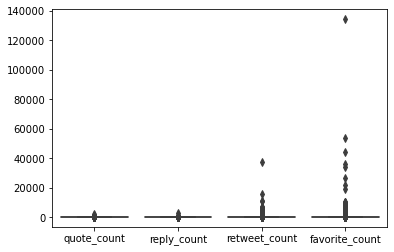

In [9]:
fig, ax = plt.subplots()

sns.boxplot(data=df[['quote_count', 'reply_count', 'retweet_count', 'favorite_count']])
plt.show()

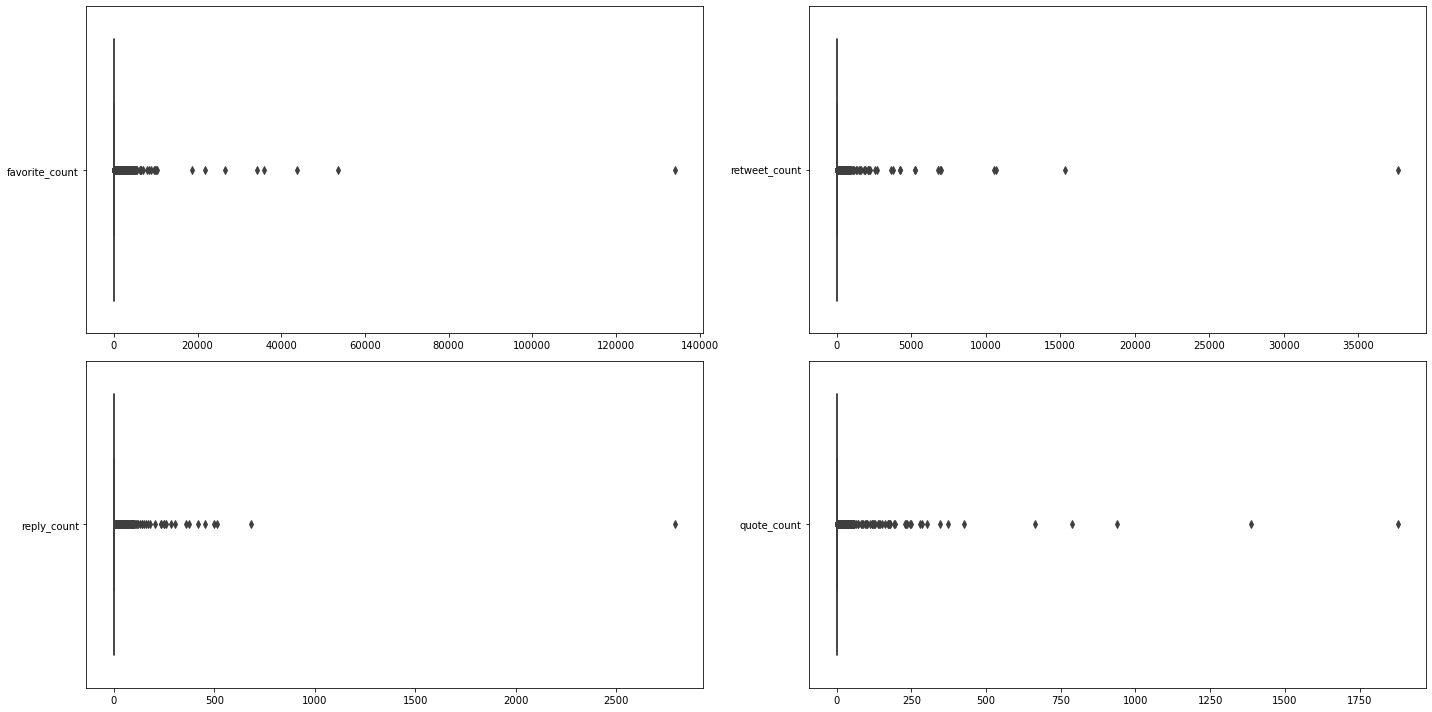

In [28]:
fig, axs = plt.subplots(2,2, figsize=(20,10))

sns.boxplot(data=df[['favorite_count']], orient='h', ax=axs[0,0])
axs[0,0].set_title='favorite_count'

sns.boxplot(data=df[['retweet_count']], orient='h', ax=axs[0,1])
axs[0,1].set_title='retweet_count'

sns.boxplot(data=df[['reply_count']], orient='h', ax=axs[1,0])
axs[1,0].set_title='reply_count'

sns.boxplot(data=df[['quote_count']], orient='h', ax=axs[1,1])
axs[1,1].set_title='quote_count'

plt.tight_layout()
plt.show()

In [32]:
for col in ['quote_count', 'reply_count', 'retweet_count', 'favorite_count']:
    quants = np.quantile(df[col], [.01, .5, .99])
    count_above_99 = sum(df[col] > np.round(quants[2]))
    print(col, quants, count_above_99)

quote_count [0.0 0.0 10.0] 178
reply_count [0.0 0.0 19.0] 180
retweet_count [0.0 0.0 116.80000000000291] 183
favorite_count [0.0 1.0 517.8000000000029] 183


In [34]:
quote_inds = df[df['quote_count'] >= 10].index
reply_inds = df[df['reply_count'] >= 19].index
retweet_inds = df[df['retweet_count'] >= 117].index
favorite_inds = df[df['favorite_count'] >= 518].index

In [35]:
len(quote_inds), len(reply_inds), len(retweet_inds), len(favorite_inds)

(193, 186, 183, 183)

In [42]:
all_inds = set(list(quote_inds) + list(reply_inds) + list(retweet_inds) + list(favorite_inds))

In [43]:
len(all_inds)

337

In [45]:
outliers_df = df.loc[all_inds]

In [46]:
df.drop(index=all_inds, inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 17924 entries, (1333476068192366593, 2152363202) to (1343490641230233601, 2394619242)
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quote_count           17924 non-null  Int64  
 1   reply_count           17924 non-null  Int64  
 2   retweet_count         17924 non-null  Int64  
 3   favorite_count        17924 non-null  Int64  
 4   user_followers_count  17924 non-null  Int64  
 5   user_verified         17924 non-null  boolean
 6   text                  17924 non-null  object 
 7   media_count           17924 non-null  Int64  
 8   media_types           17924 non-null  string 
dtypes: Int64(6), boolean(1), object(1), string(1)
memory usage: 2.8+ MB


In [48]:
df.describe()

,quote_count,reply_count,retweet_count,favorite_count,user_followers_count,media_count
count,17924.000000,17924.000000,17924.000000,17924.000000,1.792400e+04,17924.000000
mean,0.188295,0.593227,2.184111,8.549710,1.683921e+04,0.031522
std,0.755995,1.452616,7.726965,32.130848,2.054266e+05,0.204724
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.390000e+02,0.000000
50%,0.000000,0.000000,0.000000,1.000000,7.160000e+02,0.000000
75%,0.000000,1.000000,1.000000,4.000000,2.934250e+03,0.000000
max,9.000000,18.000000,115.000000,515.000000,1.804246e+07,4.000000


#### compare the distributions of different parameters based on if the user making the tweet is verified or not

In [49]:
verified = df[df.user_verified==True]
not_verified = df[df.user_verified==False]

In [50]:
verified.shape, not_verified.shape

((1073, 9), (16851, 9))

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
sts = StandardScaler()

In [55]:
sts_followers =  sts.fit_transform(df[['user_followers_count']])

In [56]:
sts_followers

array([[-0.05242508],
       [-0.08167235],
       [-0.07689192],
       ...,
       [ 0.1549443 ],
       [-0.07816735],
       [-0.03430131]])

In [57]:
verified_df = df[['user_verified']]
verified_df['xform_followers'] = sts_followers

<ipython-input-57-c9f8f4f2e52e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verified_df['xform_followers'] = sts_followers


In [58]:
verified_df.head()

,,user_verified,xform_followers
tid,uid,,
1333476068192366593,2152363202,False,-0.052425
1364161232270487553,1331332400836726785,False,-0.081672
1364161201291153414,150301804,False,-0.076892
1364161184505737217,1317091162159747075,False,-0.081901
1363439109948149760,1353391442408792066,False,-0.081078


In [63]:
verified_df.xform_followers.min()

-0.08197417047713251

In [67]:
from scipy.stats import norm

C:\Users\smana\anaconda3\envs\nlp\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


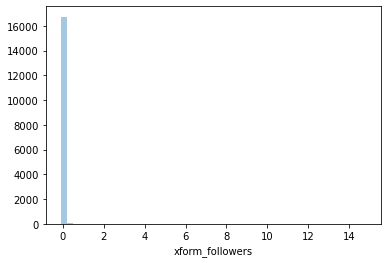

In [75]:
sns.distplot(verified_df[verified_df.user_verified==False].xform_followers, bins=50,
            kde=False)

plt.show()

In [80]:
log_v = np.log(verified['user_followers_count'].values + 1)
log_nv = np.log(not_verified['user_followers_count'].values + 1)

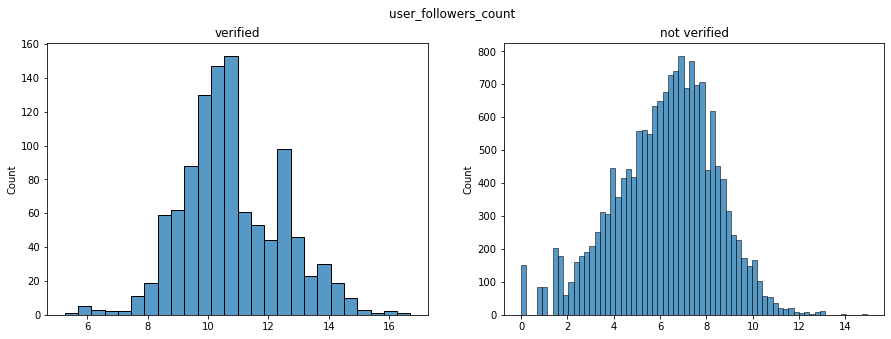

In [84]:
parameter = 'user_followers_count'

log_v = np.log(verified[parameter].values + 1)
log_nv = np.log(not_verified[parameter].values + 1)

fig, axs = plt.subplots(ncols=2, figsize=(15,5))
sns.histplot(log_v, ax=axs[0])
sns.histplot(log_nv, ax=axs[1])

axs[0].set_title('verified')
axs[1].set_title('not verified')
plt.suptitle(parameter)

plt.show()

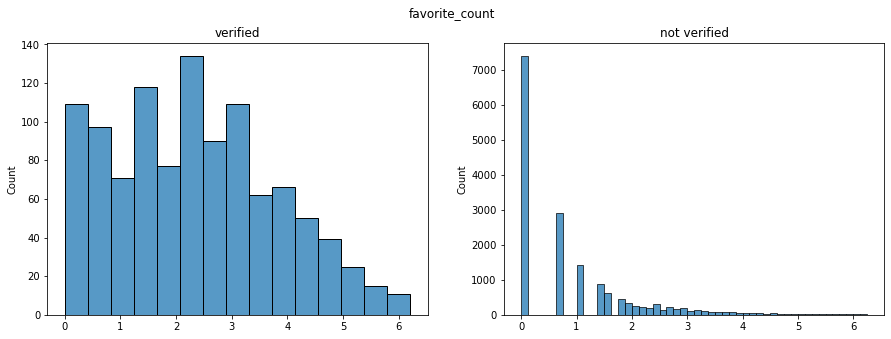

In [85]:
parameter = 'favorite_count'

log_v = np.log(verified[parameter].values + 1)
log_nv = np.log(not_verified[parameter].values + 1)

fig, axs = plt.subplots(ncols=2, figsize=(15,5))
sns.histplot(log_v, ax=axs[0])
sns.histplot(log_nv, ax=axs[1])

axs[0].set_title('verified')
axs[1].set_title('not verified')
plt.suptitle(parameter)

plt.show()

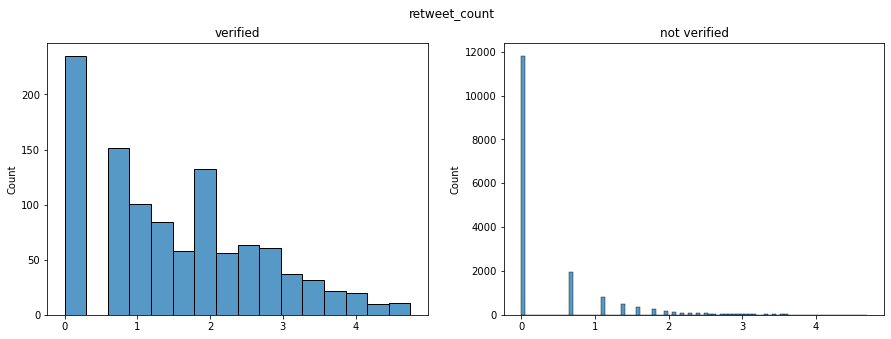

In [86]:
parameter = 'retweet_count'

log_v = np.log(verified[parameter].values + 1)
log_nv = np.log(not_verified[parameter].values + 1)

fig, axs = plt.subplots(ncols=2, figsize=(15,5))
sns.histplot(log_v, ax=axs[0])
sns.histplot(log_nv, ax=axs[1])

axs[0].set_title('verified')
axs[1].set_title('not verified')
plt.suptitle(parameter)

plt.show()

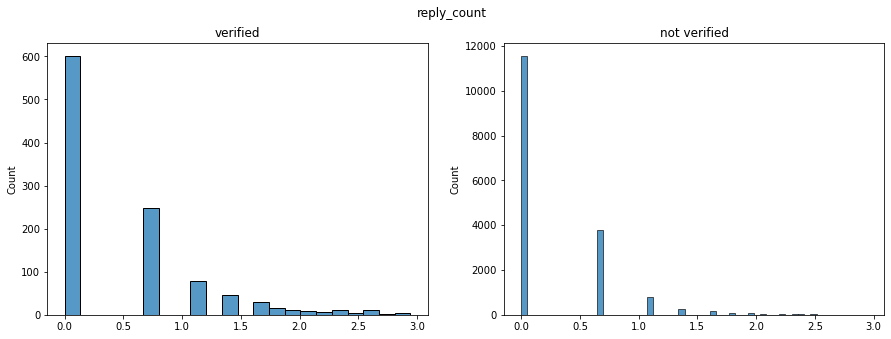

In [87]:
parameter = 'reply_count'

log_v = np.log(verified[parameter].values + 1)
log_nv = np.log(not_verified[parameter].values + 1)

fig, axs = plt.subplots(ncols=2, figsize=(15,5))
sns.histplot(log_v, ax=axs[0])
sns.histplot(log_nv, ax=axs[1])

axs[0].set_title('verified')
axs[1].set_title('not verified')
plt.suptitle(parameter)

plt.show()

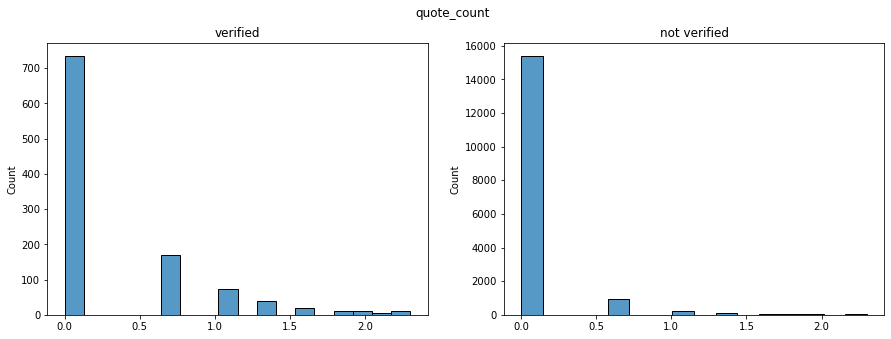

In [88]:
parameter = 'quote_count'

log_v = np.log(verified[parameter].values + 1)
log_nv = np.log(not_verified[parameter].values + 1)

fig, axs = plt.subplots(ncols=2, figsize=(15,5))
sns.histplot(log_v, ax=axs[0])
sns.histplot(log_nv, ax=axs[1])

axs[0].set_title('verified')
axs[1].set_title('not verified')
plt.suptitle(parameter)

plt.show()

#### Doing permutation tests on the favorite count parameter to see if there's a statsical difference between verified and non verified users

In [89]:
#using code from the Springboard apps project
df['permutation'] = np.random.permutation(df['favorite_count'].values).astype(int)

df.groupby('user_verified').describe()[['favorite_count', 'permutation']]

favorite_count                                                   \
                       count      mean        std  min  25%  50%   75%    max   
user_verified                                                                   
False                16851.0   7.17358  28.958670  0.0  0.0  1.0   4.0  515.0   
True                  1073.0  30.16123  59.850553  0.0  2.0  8.0  26.0  498.0   

              permutation                                                  
                    count      mean        std  min  25%  50%  75%    max  
user_verified                                                              
False             16851.0  8.695092  32.620479  0.0  0.0  1.0  4.0  515.0  
True               1073.0  6.266542  23.010173  0.0  0.0  1.0  4.0  436.0

In [90]:
df.groupby('user_verified').mean()[['favorite_count', 'permutation']]

,favorite_count,permutation
user_verified,,
False,7.17358,8.695092
True,30.16123,6.266542


In [92]:
import warnings
warnings.filterwarnings('ignore')

In [93]:
difference = []
perm_df = df[['user_verified', 'favorite_count', 'permutation']]   
for n in range(10000):
    perm_df.loc[:, 'permutation']  = np.random.permutation(perm_df['favorite_count'].values).astype(int)
    gb_df = perm_df.groupby('user_verified').mean()
    diff = gb_df.at[False, 'permutation'] - gb_df.at[True, 'permutation']
    difference.append(diff)

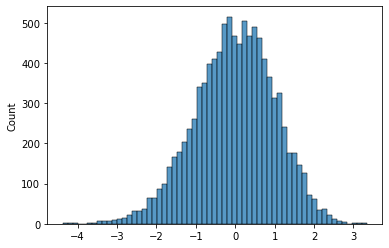

In [94]:
sns.histplot(difference)
plt.show()

In [98]:
df.groupby('user_verified').mean()['favorite_count']

user_verified
False     7.17358
True     30.16123
Name: favorite_count, dtype: float64

In [99]:
df.groupby('user_verified').median()['favorite_count']

user_verified
False    1
True     8
Name: favorite_count, dtype: Int64

In [96]:
obs_difference =  df.groupby('user_verified').mean().at[False, 'favorite_count'] - df.groupby('user_verified').mean().at[True, 'favorite_count']
obs_difference = abs(obs_difference)
print(obs_difference)

22.98764999275764


That is a VERY BIG difference between the observed means and the permutation means, and between their medians, too. Is there potentially an outlier throwing off the verified values? 

In [100]:
verified['favorite_count'].sort_values(ascending=False)[:15]

tid                  uid                
1343660017489162240  1143921823735828480    498
1371608833236348931  2729615444             491
1372650235806285824  271650180              436
1371935966798155781  369613362              424
1360268284365594627  18831926               404
1358109526411669505  65045121               395
1369764677593395202  32774989               373
1296129043864133636  29523440               348
1343870667956097026  434239640              340
1360348917989277696  78621972               340
1368988745815490561  22279296               337
1352275619464302592  19682187               326
1347990182956560385  17662250               310
1354191088173649927  125086098              301
1347588880841773057  78621972               301
Name: favorite_count, dtype: Int64

In [101]:
not_verified['favorite_count'].sort_values(ascending=False)[:15]

tid                  uid                
1315392462295371783  36638077               515
1356222328825389060  230378085              503
1356176765794869250  248448795              490
1360144333698195457  167474190              486
1349719139389206528  2482562966             484
1364727794215788547  29137381               479
1371586080328269825  23797714               476
1315376804312559618  36638077               470
1358245541163855872  4551798614             456
1315376797823971328  36638077               451
1360300599162466306  487929240              449
1358087110100590593  1336578177628434434    445
792794026126761985   1230837734             444
1362125809696317444  933028941220253697     439
1374082448796098567  1285663194078482434    428
Name: favorite_count, dtype: Int64

no, because I already took care of outliers, the top values for both verified and non verified look the same. What about the bottom values though?

In [105]:
sum(verified['favorite_count'] == 0), len(verified), (sum(verified['favorite_count'] == 0) / len(verified))

(109, 1073, 0.1015843429636533)

In [106]:
sum(not_verified['favorite_count'] == 0), len(not_verified), sum(not_verified['favorite_count'] == 0)/ len(not_verified)

(7393, 16851, 0.43872767194825235)

not only are there far fewer verified account tweets, but only 10% of them have 0 favorites, while almost 44% of the almost 17k non verified tweets have 0 favorites. This is definitely skewing the results here. 

If a tweet gets at least 1 favorite, then is there a statisitical difference between the number of favorites between verified and non verified user tweets?

In [108]:
df_0 = df[df.favorite_count>0]
df_0['permutation'] = np.random.permutation(df_0['favorite_count'].values).astype(int)
df_0.groupby('user_verified').mean()[['favorite_count']]

,favorite_count
user_verified,
False,12.780926
True,33.571577


In [109]:
difference = []
perm_df = df_0[['user_verified', 'favorite_count', 'permutation']]   
for n in range(10000):
    perm_df.loc[:, 'permutation']  = np.random.permutation(perm_df['favorite_count'].values).astype(int)
    gb_df = perm_df.groupby('user_verified').mean()
    diff = gb_df.at[False, 'permutation'] - gb_df.at[True, 'permutation']
    difference.append(diff)

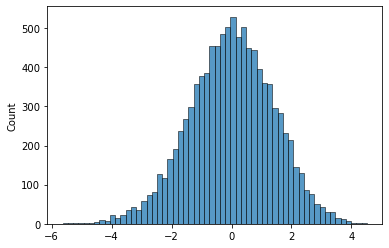

In [110]:
sns.histplot(difference)
plt.show()

In [112]:
df_0.groupby('user_verified').mean()['favorite_count']

user_verified
False    12.780926
True     33.571577
Name: favorite_count, dtype: float64

In [113]:
obs_difference =  df_0.groupby('user_verified').mean().at[False, 'favorite_count'] - df_0.groupby('user_verified').mean().at[True, 'favorite_count']
obs_difference = abs(obs_difference)
print(obs_difference)

20.79065056344318


In [114]:
p = np.sum(np.array(difference) >= obs_difference) / len(difference)
p

0.0

Even removing all tweets with 0 favorites, the difference in number favorites per tweet between verified and not verified users is statistically significant, with a p value that is vanishingly small.

this presents a bit of a challenge for my analysis, since being verified or not is not always in the control of the account owners. While an organization has a better chance of getting verified than an individual, it's not a guarantee. I will have to consider whether or not to exclude tweets from verified accounts for my analysis.

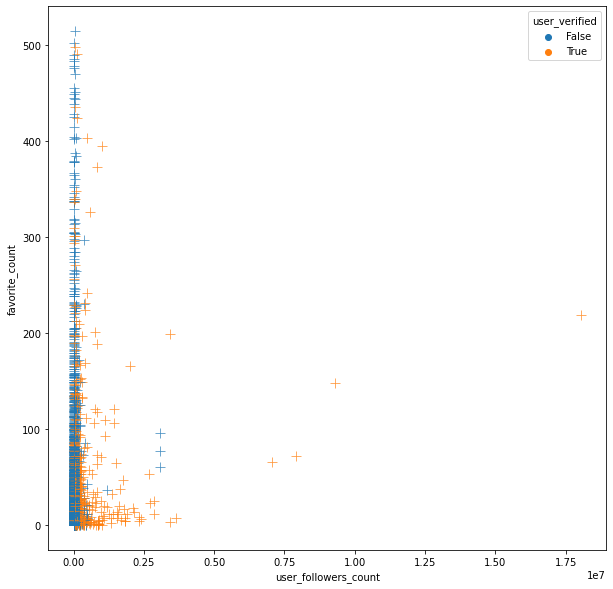

In [115]:
fig, ax = plt.subplots(figsize=(10,10))
s = sns.scatterplot(data=df, x='user_followers_count', y='favorite_count', hue='user_verified',
                alpha=.8, marker='+', s=100
           )
plt.show()

while from this plot it looks like verified users tend to have more followers, it still looks like the majority of higher favorite count tweets come from accounts with relatively lower follower counts, whether or not they're verified.

In [116]:
x = np.array(df['user_followers_count'])
y = np.array(df['favorite_count'])

In [117]:
r = np.corrcoef(x.astype(int),y.astype(int))[0,1]
r_sq = r**2
r_sq

0.01370255059961829

There is no correlation between user follower count and favorite count of a tweet they made. 

Just to check, since there are so many values that are zero, let's log+1 transform and try again.

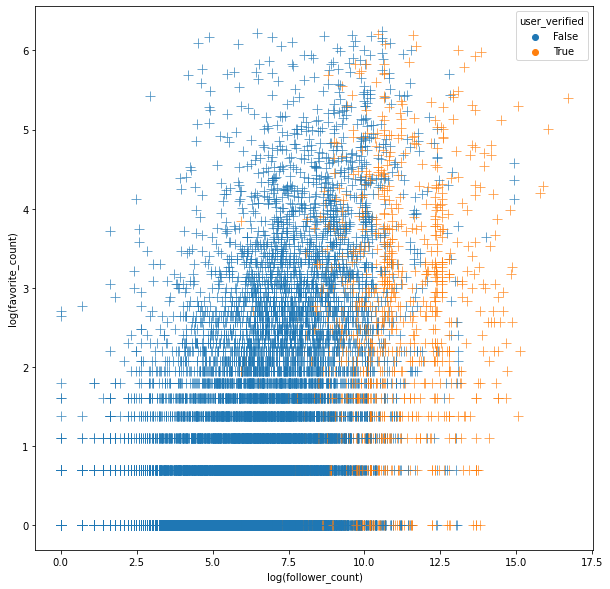

In [119]:
fig, ax = plt.subplots(figsize=(10,10))
log_v = np.log(verified[parameter].values + 1)
log_nv = np.log(not_verified[parameter].values + 1)

s = sns.scatterplot(data=df, x=np.log(df['user_followers_count'].values+1), 
                    y=np.log(df['favorite_count'].values+1), hue='user_verified',
                alpha=.8, marker='+', s=100
           )

ax.set_xlabel("log(follower_count)")
ax.set_ylabel("log(favorite_count)")
plt.show()

AGain, it looks like though verified users tend to have higher follower counts, the overall favorite count doesn't seem to be affected by follower count.

In [120]:
r = np.corrcoef(np.log(x.astype(int) +1),np.log(y.astype(int) +1))[0,1]
r_sq = r**2
r_sq

0.19082457752694154

There is a very weak correlation here. Still not enough to say that follower count itself is what's responsible for the increased favorites that verified accounts get.

So it doesn't appear that verified users' tendency to have a higher follower count isn't what's responsible for the higher favorite counts. Likely, Twitter's algorithms which favor displaying tweets of verified users is what's responsible here. 

This still leaves me with the decision of what to do regarding tweets from verified accounts. 